<a href="https://colab.research.google.com/github/ainesko/NGS-HW1/blob/main/NGS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Скачивание файлов с диска


По ссылкам скачиваем с гугл-диска все файлы (кажется, работает только для Google Colab)

In [1]:
def download_from_disk(id):
  import gdown
  gdown.download(f'https://drive.google.com/uc?id={id}&confirm=t', quiet=False)

In [2]:
download_from_disk('1a18Uwzy-Dz10OmQZwsLrX4sntOuBxnew')

Downloading...
From: https://drive.google.com/uc?id=1a18Uwzy-Dz10OmQZwsLrX4sntOuBxnew&confirm=t
To: /content/ONT_2D.fastq.gz
100%|██████████| 143M/143M [00:02<00:00, 58.8MB/s]


In [3]:
download_from_disk('18VFr3uyICex0Xd8_rH6Tdhmr3GFIPr7C')

Downloading...
From: https://drive.google.com/uc?id=18VFr3uyICex0Xd8_rH6Tdhmr3GFIPr7C&confirm=t
To: /content/pacbio_40x.fq.gz
100%|██████████| 198M/198M [00:04<00:00, 46.6MB/s]


In [4]:
download_from_disk('1unVHbhqU47hAGEY_wzbdBababBYNB5Df')

Downloading...
From: https://drive.google.com/uc?id=1unVHbhqU47hAGEY_wzbdBababBYNB5Df&confirm=t
To: /content/reference.fasta
100%|██████████| 4.71M/4.71M [00:00<00:00, 40.4MB/s]


# Установка программ

In [5]:
!pip install -q condacolab

In [13]:
import condacolab

In [14]:
condacolab.install()

✨🍰✨ Everything looks OK!


In [1]:
!conda install -c bioconda minimap2

Solving environment: / - \ | / - \ | done

# All requested packages already installed.



In [2]:
!conda install -c bioconda samtools

Solving environment: - \ | / - \ | / - \ | / - done

# All requested packages already installed.



In [4]:
!apt-get install bowtie2 samtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
bowtie2 is already the newest version (2.3.4.1-1).
samtools is already the newest version (1.7-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


# 0. Разобраться с minimap2

In [5]:
!minimap2 -a --MD ONT_2D.fastq.gz reference.fasta > test.sam

[M::mm_idx_gen::5.909*1.53] collected minimizers
[M::mm_idx_gen::7.337*1.61] sorted minimizers
[M::main::7.340*1.61] loaded/built the index for 30810 target sequence(s)
[M::mm_mapopt_update::7.514*1.60] mid_occ = 74
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 30810
[M::mm_idx_stat::7.637*1.59] distinct minimizers: 9405867 (76.33% are singletons); average occurrences: 2.662; average spacing: 5.377
[M::worker_pipeline::15.709*1.28] mapped 1 sequences
[M::main] Version: 2.17-r941
[M::main] CMD: minimap2 -a --MD ONT_2D.fastq.gz reference.fasta
[M::main] Real time: 15.837 sec; CPU: 20.299 sec; Peak RSS: 1.440 GB


**Oxford Nanopores**

In [6]:
!minimap2 -d ref.mmi reference.fasta  

[M::mm_idx_gen::0.175*1.05] collected minimizers
[M::mm_idx_gen::0.226*1.21] sorted minimizers
[M::main::0.278*1.17] loaded/built the index for 1 target sequence(s)
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.289*1.16] distinct minimizers: 838533 (98.18% are singletons); average occurrences: 1.034; average spacing: 5.352
[M::main] Version: 2.17-r941
[M::main] CMD: minimap2 -d ref.mmi reference.fasta
[M::main] Real time: 0.297 sec; CPU: 0.342 sec; Peak RSS: 0.068 GB


In [7]:
!minimap2 -a --MD -o ont_alignment.sam  ref.mmi ONT_2D.fastq.gz 

[M::main::0.060*1.17] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.073*1.14] mid_occ = 11
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.082*1.12] distinct minimizers: 838533 (98.18% are singletons); average occurrences: 1.034; average spacing: 5.352
[M::worker_pipeline::45.272*1.87] mapped 30810 sequences
[M::main] Version: 2.17-r941
[M::main] CMD: minimap2 -a --MD -o ont_alignment.sam ref.mmi ONT_2D.fastq.gz
[M::main] Real time: 45.303 sec; CPU: 84.529 sec; Peak RSS: 0.940 GB


In [15]:
!samtools view -bS -o ont_alignment.bam ont_alignment.sam

In [16]:
!samtools sort -o ont_alignment_sorted.bam ont_alignment.bam

In [17]:
!samtools index -b ont_alignment_sorted.bam ont_alignment.bai

In [18]:
!samtools flagstat ont_alignment_sorted.bam

32103 + 0 in total (QC-passed reads + QC-failed reads)
1072 + 0 secondary
221 + 0 supplementary
0 + 0 duplicates
29565 + 0 mapped (92.09% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


**PacBio**

In [ ]:
!minimap2 -ax  map-pb  reference.fasta pacbio_40x.fq.gz > pb_aln.sam

In [149]:
!samtools view -bS -o pb_aln.bam pb_aln.sam

In [150]:
!samtools sort -o pb_aln_sorted.bam pb_aln.bam

In [151]:
!samtools index -b pb_aln_sorted.bam pb_aln.bai

In [152]:
!samtools flagstat pb_aln_sorted.bam

52081 + 0 in total (QC-passed reads + QC-failed reads)
1736 + 0 secondary
8898 + 0 supplementary
0 + 0 duplicates
51199 + 0 mapped (98.31% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


Результаты выравниваний выше и ниже немного отличаются (в силу адаптации алгоритмов программы выше под PacBio, но для работы удобнее нижнее.

In [19]:
!minimap2 -a --MD -o pacbio_alignment.sam  ref.mmi pacbio_40x.fq.gz 

[M::main::0.092*1.13] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.107*1.10] mid_occ = 11
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.117*1.09] distinct minimizers: 838533 (98.18% are singletons); average occurrences: 1.034; average spacing: 5.352
[M::worker_pipeline::131.037*1.90] mapped 41447 sequences
[M::main] Version: 2.17-r941
[M::main] CMD: minimap2 -a --MD -o pacbio_alignment.sam ref.mmi pacbio_40x.fq.gz
[M::main] Real time: 131.087 sec; CPU: 249.463 sec; Peak RSS: 2.025 GB


In [21]:
!samtools view -bS -o pacbio_alignment.bam pacbio_alignment.sam

In [22]:
!samtools sort -o pacbio_alignment_sorted.bam pacbio_alignment.bam

In [23]:
!samtools index -b pacbio_alignment_sorted.bam pacbio_alignment.bai

In [24]:
!samtools flagstat pacbio_alignment_sorted.bam

49743 + 0 in total (QC-passed reads + QC-failed reads)
1528 + 0 secondary
6768 + 0 supplementary
0 + 0 duplicates
48434 + 0 mapped (97.37% : N/A)
0 + 0 paired in sequencing
0 + 0 read1
0 + 0 read2
0 + 0 properly paired (N/A : N/A)
0 + 0 with itself and mate mapped
0 + 0 singletons (N/A : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

In [26]:
data = {'Общее число ридов':[32103,
                             49743],
        
        'Приложившиеся':['29565 (92.09%)',
                              '448434 (97.37%)']}

df = pd.DataFrame(data, index =['Oxford Nanopores',
                                'PacBio'])
df

,Общее число ридов,Приложившиеся
Oxford Nanopores,32103,29565 (92.09%)
PacBio,49743,448434 (97.37%)


# 1. Статистики ридов PacBio и Oxford Nanopores.

## Функции

Функция, которая по sam-файлу возвращает множество значений FLAG (второй столбец).

In [27]:
def flags(file):
  with open(file, 'r') as f:
    l = [line.strip() for line in f]
    s = set()
    for i in range(3, len(l)):
      a = l[i].split('\t')
      sc = a[1]
      if sc not in s:
        s.add(sc)
    return s

In [30]:
flags('ont_alignment.sam')

{'0', '16', '2048', '2064', '256', '272', '4'}

In [31]:
flags('pacbio_alignment.sam')

{'0', '16', '2048', '2064', '256', '272', '4'}

Не приложились только риды с FLAG = 4

Найдём длину референсного генома.

In [171]:
def lenth(file):
  with open(file, 'r') as f:
    lines = f.readlines()
    l = 0
    for i in range(1, len(lines)):
      l += len(lines[i])
    return l

In [173]:
def coverage(file):
  with open(file, 'r') as f:
    l = [line.strip() for line in f]
    n = lenth('reference.fasta')
    s = [0] * n
    for i in range(3, len(l)):
      a = l[i].split('\t')
      if int(a[1]) != 4:
        for i in range(int(a[3]) + 1, int(a[3]) + len(a[9]) + 1):
          s[i] += 1
    df = pd.DataFrame()
    df['coverage'] = s
    print(f'Процент покрытого генома: {round((len(s) - s.count(0)) / len(s), 3)}')
    print(f'Среднее покрытие: {round(np.mean(s), 3)}')
    graph = sns.lineplot(data=df, x=df.index, y=df['coverage'])
    return graph

## 1) Покрытие генома

***Oxford Nanopores***

Процент покрытого генома: 0.988
Среднее покрытие: 27.12


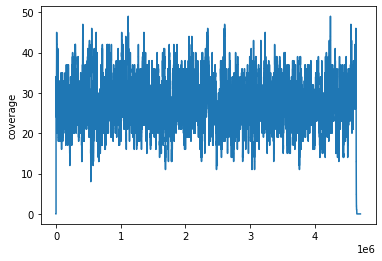

In [174]:
coverage('ont_alignment.sam')

***PacBio***

Процент покрытого генома: 0.987
Среднее покрытие: 47.465


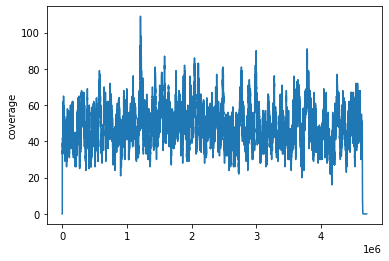

In [175]:
coverage('pacbio_alignment.sam')

In [176]:
data = {'Среднее покрытие':[27.12,
                             47.465],
        
        'Доля покрытой области генома':['0.988',
                              '0.987']}

df = pd.DataFrame(data, index =['Oxford Nanopores',
                                'PacBio'])
df

,Среднее покрытие,Доля покрытой области генома
Oxford Nanopores,27.120,0.988
PacBio,47.465,0.987


## 2) Процент ошибок

In [56]:
import re

***Oxford Nanopores***

In [49]:
!cat ont_alignment.sam | cut -s -f 6 | grep -v '*' > CIGAR_ont.txt

In [59]:
def error(file):
  with open(file, 'r') as f:
    cigarettes = f.readlines()
    CIGAR = {"M":0, 'S':0, 'H':0, 'D':0,'I':0}
  errors = 0
  for cigarette in cigarettes:
    string = cigarette.rstrip()
    matches = re.findall(r'(\d+)([A-Z]{1})', string)
    length = 0
    error = 0
    for match in matches:
        CIGAR[match[1]] += int(match[0])
        length += int(match[0])
        if match[1] == 'D' or match[1] == 'I' or match[1] == 'X':
            error += int(match[0])
    if length != 0:
        errors += error/length
  errors /= len(cigarettes)
  print('Процент ошибок')
  return round(errors, 3)

In [60]:
error('CIGAR_ont.txt')

Процент ошибок


0.057

***PacBio***

In [61]:
!cat pacbio_alignment.sam | cut -s -f 6 | grep -v '*' > CIGAR_pacbio.txt

In [62]:
error('CIGAR_pacbio.txt')

Процент ошибок


0.087

In [21]:
data = {'Средний процент ошибок':['5.7%',
                             '8.7%']}

df = pd.DataFrame(data, index =['Oxford Nanopores',
                                'PacBio'])
df

,Средний процент ошибок
Oxford Nanopores,5.7%
PacBio,8.7%


## 3) Распределение типов замен

In [8]:
!pip install pysam

     |████████████████████████████████| 14.9 MB 30.6 MB/s 


In [9]:
import pysam

In [10]:
def nucl_repl(file):
  samfile = pysam.AlignmentFile(file, "r")
  df = pd.DataFrame(np.zeros((4, 4)).astype(int), index = ['A', 'T', 'C', 'G'], columns = ['A', 'T', 'C', 'G'])
  pairs = []
  for read in samfile.fetch():
    if not read.is_unmapped and read.seq is not None:
        ref = read.get_reference_sequence()
        for read_nucleotide_idx, _, ref_nucleotide in read.get_aligned_pairs(matches_only=True, with_seq=True):
                read_nucleotide = read.query[read_nucleotide_idx - read.query_alignment_start].upper()
                if read_nucleotide.upper() != ref_nucleotide.upper() and read_nucleotide.upper() != 'N':
                    pairs.append([read_nucleotide.upper(), ref_nucleotide.upper()])
  df = pd.DataFrame(np.zeros((4, 4)).astype(int), index = ['A', 'T', 'C', 'G'], columns = ['A', 'T', 'C', 'G'])
  df.loc['A', 'C'] = pairs.count(['A', 'C'])
  df.loc['A', 'G'] = pairs.count(['A', 'G'])
  df.loc['A', 'T'] = pairs.count(['A', 'T'])
  df.loc['C', 'A'] = pairs.count(['C', 'A'])
  df.loc['C', 'G'] = pairs.count(['C', 'G'])
  df.loc['C', 'T'] = pairs.count(['C', 'T']) 
  df.loc['G', 'A'] = pairs.count(['G', 'A'])
  df.loc['G', 'C'] = pairs.count(['G', 'C'])
  df.loc['G', 'T'] = pairs.count(['G', 'T'])
  df.loc['T', 'A'] = pairs.count(['T', 'A'])
  df.loc['T', 'C'] = pairs.count(['T', 'C'])
  df.loc['T', 'G'] = pairs.count(['T', 'G'])

  return df 

***Oxford Nanopores***

In [17]:
nucl_repl('ont_alignment.sam')

,A,T,C,G
A,0,107765,137046,319761
T,105373,0,340675,126487
C,112963,372780,0,91353
G,368487,111447,85027,0


***PacBio***

In [20]:
nucl_repl('pacbio_alignment.sam')

,A,T,C,G
A,0,285699,457338,322254
T,285427,0,321990,450152
C,354487,309393,0,415583
G,307539,359744,414331,0


## 4) Распределение длин инделов

***Oxford Nanopores***

In [36]:
!samtools stats ont_alignment_sorted.bam | grep ID > ont_stats.txt

In [85]:
!head ont_stats.txt

# Indel distribution. Use `grep ^ID | cut -f 2-` to extract this part. The columns are: length, number of insertions, number of deletions
ID	1	525344	1897085
ID	2	207341	758942
ID	3	81779	368504
ID	4	31719	145775
ID	5	14057	71921
ID	6	6762	41815
ID	7	3555	22268
ID	8	1995	13439
ID	9	1186	9334


In [128]:
def indel(file):
  with open(file, 'r') as f:
    l = [line.strip() for line in f]
    IS = [0] * (len(l) - 1)
    COUNT = [0] * (len(l) - 1)
    sum_DEL = 0
    count_DEL = 0
    sum_INS = 0
    count_INS = 0
    for i in range(1, len(l)):
      a = l[i].split('\t')
      IS[i - 1] = int(a[1])
      sum_DEL += int(a[1]) * int(a[2])
      sum_INS += int(a[1]) * int(a[3])
      count_DEL += int(a[2])
      count_INS += int(a[3])
      COUNT[i - 1] = int(a[2]) + int(a[3])
  mean_DEL = sum_DEL / count_DEL
  mean_INS = sum_INS / count_INS
  print(f'Средняя длина делеции = {round(mean_DEL, 3)}', f'Средняя длина вставки = {round(mean_INS, 3)}')
  df = pd.DataFrame()
  df['indel size'] = IS
  df['count'] = COUNT
  graph = sns.lineplot(data=df, x=df['indel size'], y=df['count'])
  return graph

In [129]:
def indelcut(file):
  with open(file, 'r') as f:
    l = [line.strip() for line in f]
    IS = [0] * (len(l) - 1)
    COUNT = [0] * (len(l) - 1)
    sum_DEL = 0
    count_DEL = 0
    sum_INS = 0
    count_INS = 0
    for i in range(11, 27):
      a = l[i].split('\t')
      IS[i - 1] = int(a[1])
      sum_DEL += int(a[1]) * int(a[2])
      sum_INS += int(a[1]) * int(a[3])
      count_DEL += int(a[2])
      count_INS += int(a[3])
      COUNT[i - 1] = int(a[2]) + int(a[3])
  mean_DEL = sum_DEL / count_DEL
  mean_INS = sum_INS / count_INS
  print(f'Средняя длина делеции = {round(mean_DEL, 3)}', f'Средняя длина вставки = {round(mean_INS, 3)}')
  df = pd.DataFrame()
  df['indel size'] = IS
  df['count'] = COUNT
  graph = sns.lineplot(data=df, x=df['indel size'], y=df['count'])
  return graph

Средняя длина делеции = 1.727 Средняя длина вставки = 1.884


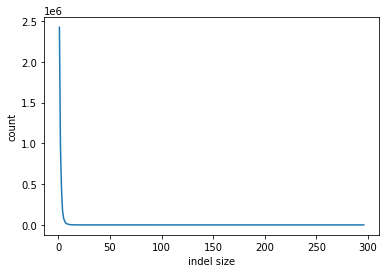

In [130]:
indel('ont_stats.txt')

Поскольку основной объём значений приходится на маленькие (0-5) размеры делеций и вставок, что можно сказать как по head, так по графику и средней длине, то отобразим промежуточную часть между резким падением в начале и почти постоянным значением (1-2) в конце, а именно размеры 10-25

Средняя длина делеции = 12.886 Средняя длина вставки = 13.395


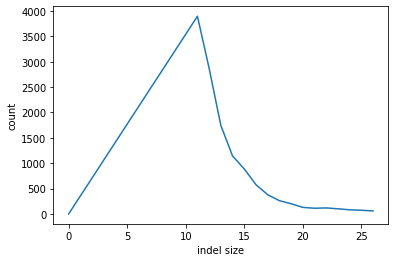

In [131]:
indelcut('ont_stats.txt')

***PacBio***

In [108]:
!samtools stats pacbio_alignment_sorted.bam | grep ID > pacbio_stats.txt

In [123]:
!head pacbio_stats.txt

# Indel distribution. Use `grep ^ID | cut -f 2-` to extract this part. The columns are: length, number of insertions, number of deletions
ID	1	8002082	5017580
ID	2	1669491	657032
ID	3	489159	113130
ID	4	193685	32598
ID	5	95802	12624
ID	6	52842	5682
ID	7	32569	3276
ID	8	20722	1984
ID	9	13803	1268


In [135]:
def indelcut(file):
  with open(file, 'r') as f:
    l = [line.strip() for line in f]
    IS = [0] * (len(l) - 1)
    COUNT = [0] * (len(l) - 1)
    sum_DEL = 0
    count_DEL = 0
    sum_INS = 0
    count_INS = 0
    for i in range(17, 100):
      a = l[i].split('\t')
      IS[i - 1] = int(a[1])
      sum_DEL += int(a[1]) * int(a[2])
      sum_INS += int(a[1]) * int(a[3])
      count_DEL += int(a[2])
      count_INS += int(a[3])
      COUNT[i - 1] = int(a[2]) + int(a[3])
  mean_DEL = sum_DEL / count_DEL
  mean_INS = sum_INS / count_INS
  print(f'Средняя длина делеции = {round(mean_DEL, 3)}', f'Средняя длина вставки = {round(mean_INS, 3)}')
  df = pd.DataFrame()
  df['indel size'] = IS
  df['count'] = COUNT
  graph = sns.lineplot(data=df, x=df['indel size'], y=df['count'])
  return graph

Средняя длина делеции = 1.508 Средняя длина вставки = 1.199


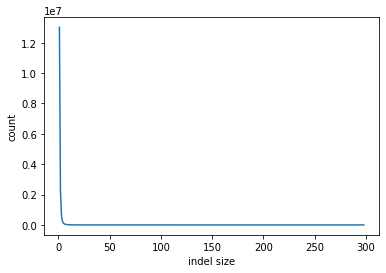

In [133]:
indel('pacbio_stats.txt')

В этом файле бОльшие срезы дают достаточно информации. Например, то значения 20 резкое падение, а затем спуск по кочкам. Дальнейшее увеличение рамки сглаживает неровности, становится менее интересно.

Средняя длина делеции = 34.329 Средняя длина вставки = 34.042


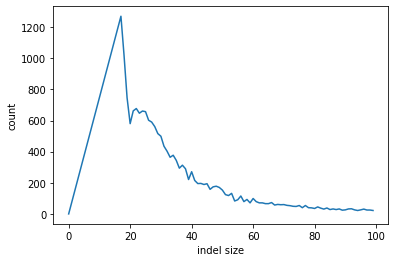

In [136]:
indelcut('pacbio_stats.txt')

## Сравнение результатов

У PacBio, вероятно, в силу того, что среднее покрытие больше, более интересен график распределение инделов. Вообще у PacBio при большем количестве ридов большее их приложение и прочее. В обоих случаях инделы сосредоточены в районе длины 1-2, а дальше количество падает.